In [207]:
#http://www.lotoideas.com/primitiva-resultados-historicos-de-todos-los-sorteos/
import numpy as np
import pandas as pd

%matplotlib inline

In [208]:
data = pd.read_csv('2013-2018.csv')
data.columns= ['Date','N1','N2','N3','N4','N5','N6','Comp','R','Joker']
data.set_index(pd.to_datetime(data['Date'] , format='%d/%m/%Y'), inplace=True)
data.sort_index(inplace=True)
data.head()

,Date,N1,N2,N3,N4,N5,N6,Comp,R,Joker
Date,,,,,,,,,,
2013-01-03,3/01/2013,3,15,23,26,34,38,16,7,4357350
2013-01-05,5/01/2013,1,4,9,11,38,48,26,6,3657952
2013-01-10,10/01/2013,29,32,34,42,44,46,26,2,7389430
2013-01-12,12/01/2013,2,3,19,20,29,37,1,4,4224561
2013-01-17,17/01/2013,1,23,30,41,43,49,10,8,2869685


,N1,N2,N3,N4,N5,N6,Comp,R,Joker
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,5.890000e+02
mean,7.064516,14.149406,21.624788,28.719864,35.650255,42.940577,24.657046,4.480475,4.942608e+06
std,5.759279,7.348336,8.247869,8.304041,7.283608,5.662702,13.786807,2.889409,2.812848e+06
min,1.000000,2.000000,3.000000,5.000000,11.000000,17.000000,1.000000,0.000000,5.053000e+03
25%,3.000000,9.000000,15.000000,23.000000,31.000000,40.000000,14.000000,2.000000,2.459821e+06
50%,5.000000,13.000000,21.000000,29.000000,37.000000,44.000000,24.000000,4.000000,4.957111e+06
75%,10.000000,19.000000,28.000000,35.000000,41.000000,47.000000,36.000000,7.000000,7.293360e+06
max,29.000000,38.000000,42.000000,47.000000,48.000000,49.000000,49.000000,9.000000,9.950099e+06


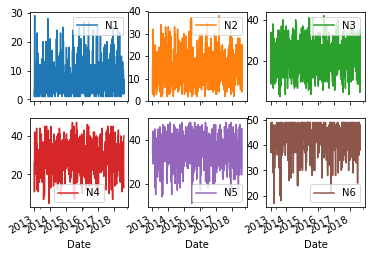

In [209]:
ax = data.iloc[:,1:7].plot(subplots=True, layout=(2,3))
data.describe()

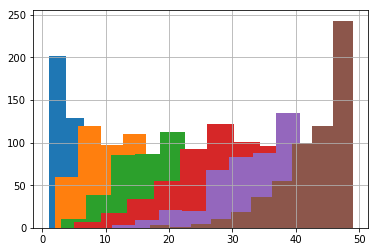

In [210]:
data.N1.hist()
data.N2.hist()
data.N3.hist()
data.N4.hist()
data.N5.hist()
data.N6.hist()

Seeing the previous graphs it's obvious to say that the distribution of numbers are clearly random and steady.

In [211]:
#distance between numbers
data['D12'] = data.N2 - data.N1
data['D23'] = data.N3 - data.N2
data['D34'] = data.N4 - data.N3
data['D45'] = data.N5 - data.N4
data['D56'] = data.N6 - data.N5

In [243]:
#number odds and evens
data['evens'] = data.iloc[:,1:7].apply(lambda x: x%2).sum(axis=1)
data['odds'] = 6 - data['evens']

In [291]:
data['Timestamp'] = pd.to_datetime(data['Date'] , format='%d/%m/%Y').apply(lambda x: pd.Timestamp(x).value)
data.head()

,Date,N1,N2,N3,N4,N5,N6,Comp,R,Joker,D12,D23,D34,D45,D56,evens,odds,Timestamp
Date,,,,,,,,,,,,,,,,,,
2013-01-03,3/01/2013,3,15,23,26,34,38,16,7,4357350,12,8,3,8,4,3,3,1357171200000000000
2013-01-05,5/01/2013,1,4,9,11,38,48,26,6,3657952,3,5,2,27,10,3,3,1357344000000000000
2013-01-10,10/01/2013,29,32,34,42,44,46,26,2,7389430,3,2,8,2,2,1,5,1357776000000000000
2013-01-12,12/01/2013,2,3,19,20,29,37,1,4,4224561,1,16,1,9,8,4,2,1357948800000000000
2013-01-17,17/01/2013,1,23,30,41,43,49,10,8,2869685,22,7,11,2,6,5,1,1358380800000000000


In [198]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X, y = data.iloc[:,1:7].values, data.iloc[:,7:14].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)